In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt
from konlpy.tag import Mecab
import urllib.request
from gensim.models.word2vec import Word2Vec
from tensorflow.keras import utils
import gensim
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train = pd.read_excel('train.xlsx', engine='openpyxl')
df_test = pd.read_excel('test.xlsx', engine='openpyxl')

In [ ]:
df_train.replace(np.nan, '', inplace=True)

ls = {}
df = pd.DataFrame(ls)
df['문장'] = df_train[['사람문장1', '사람문장2',
                     '사람문장3','사람문장4']].apply(' '.join, axis =1)

df['감정'] = df_train['감정_대분류']

df['문장'].replace('', np.nan, inplace=True)
print(df.isnull().values.any())
print(df.isnull().sum())
df = df.dropna(how = 'any')

False
문장    0
감정    0
dtype: int64


In [ ]:
df['감정'][df['감정'] == '기쁨 '] = '기쁨'
df['감정'][df['감정'] == '불안 '] = '불안'

le = LabelEncoder()
le.fit(df['감정'])
print(le.classes_)
df['감정_label']=le.transform(df['감정'])

['기쁨' '당황' '분노' '불안' '상처' '슬픔']


In [ ]:
# 한글과 공백을 제외하고 모두 제거
df['문장'] = df['문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/Users/jhw/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


<AxesSubplot:>

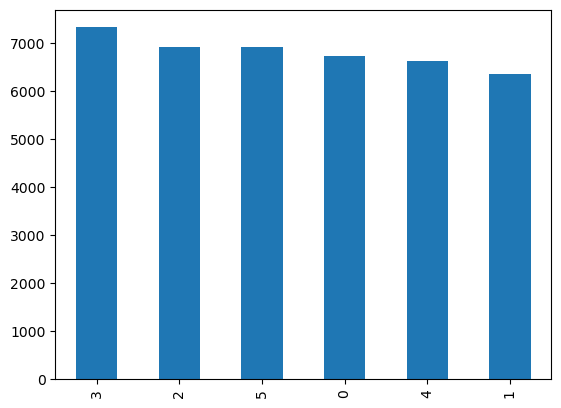

In [ ]:
df['감정_label'].value_counts().plot(kind='bar')

In [ ]:
# train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 11)

In [ ]:
# 잘 설치 되었는지 확인
# ! mecab --version

In [ ]:
# from konlpy.tag import Mecab
# mecab = Mecab()
# mecab.morphs("아버지가방에들어가신다")

In [ ]:
# stopwords = ['도', '는', '다', '의', '가', '이', '은', '한',
#              '에', '하', '고', '을', '를', '인', '듯', '과',
#              '와', '네', '들', '듯', '지', '임', '게', '것',
#              '어', '겠', '있', '군요', '해', '계섯', '시',
#              '나', '셨', '을까요', '으로']

# mecab = Mecab()

# train_data['tokenized'] = train_data['문장'].apply(mecab.morphs)
# train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
# test_data['tokenized'] = test_data['문장'].apply(mecab.morphs)
# test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
# train_data

In [ ]:
import pickle

with open("train_data.pkl","rb") as f:
    train_data = pickle.load(f)

with open("test_data.pkl","rb") as f:
    test_data = pickle.load(f)

In [ ]:
train_data[:5]

,문장,감정,감정_label,tokenized
25709,예전에는 입원하면 손자들이 병문안을 왔었어 그런데 이제는 커서 그런지 입원해도 안부...,상처,4,"[예전, 입원, 면, 손자, 병문안, 왔었, 그런데, 이제, 커서, 그런지, 입원,..."
36926,나 기분이 우울해 가족들이랑 사이가 좋아지질 않아 맞아 어떻게 해야 할지 모르겠어,슬픔,5,"[기분, 우울해, 가족, 이랑, 사이, 좋, 아, 질, 않, 아, 맞, 아, 어떻게..."
9481,선생님이랑 진로 상담을 해야 하는데 나는 아직 진로를 정하지 못해서 불안해 몇 가지...,불안,3,"[선생, 님, 이랑, 진로, 상담, 해야, 는데, 아직, 진로, 정하, 못해서, 불..."
14771,나 요새 친구들이랑 대화하는 게 어려워 친구가 날 좋아하지 않을까 봐 걱정되고 내가...,불안,3,"[요새, 친구, 이랑, 대화, 어려워, 친구, 날, 좋, 아, 않, 을까, 봐, 걱..."
20908,원하는 기업에 원서 넣었던 거 서류전형 합격했어 서류전형 합격했으니 임원 면접이 남...,기쁨,0,"[원, 기업, 원서, 넣, 었, 던, 거, 서류, 전형, 합격, 했, 서류, 전형,..."


In [ ]:
print(train_data['tokenized'].values[1])
      
print(train_data['감정_label'].values[1])

['기분', '우울해', '가족', '이랑', '사이', '좋', '아', '질', '않', '아', '맞', '아', '어떻게', '해야', '할지', '모르']
5


In [ ]:
# np.array로 반환
X_train = train_data['tokenized'].values
y_train = train_data['감정_label'].values
X_test= test_data['tokenized'].values
y_test = test_data['감정_label'].values

In [ ]:
print(X_train[1])

['기분', '우울해', '가족', '이랑', '사이', '좋', '아', '질', '않', '아', '맞', '아', '어떻게', '해야', '할지', '모르']


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)

In [ ]:
tokenizer = Tokenizer(len(tokenizer.word_index)) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
print("둘 다 text -> 정수로 변환 해줍니다 \n\n")
print(X_train[1])
print(X_test[1])

둘 다 text -> 정수로 변환 해줍니다 


[66, 355, 88, 177, 370, 9, 1, 231, 12, 1, 97, 1, 71, 26, 120, 47]
[57, 2, 4505, 64, 2, 2385, 20, 2679, 3222, 45, 268, 117, 63, 36, 991, 330, 1938, 12, 37, 11, 112, 3285, 235, 27, 150, 51, 2396, 1186, 64, 1727, 10918, 661, 281, 57, 729, 67]


In [ ]:
print('문장의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
# plt.hist([len(s) for s in X_train], bins=50)
# plt.xlabel('length of samples')
# plt.ylabel('number of samples')
# plt.show()

문장의 최대 길이 : 99
문장의 평균 길이 : 30.813564504785493


In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.59636730575177


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train.shape

(32703, 60)

In [ ]:
# X_train = X_train.reshape(-1, 32703, max_len)
# X_test  = X_test.reshape(-1, X_test.shape[0], max_len)
# y_train = y_train.reshape(-1, 32703, 1)
# y_test = y_test.reshape(-1, y_test.shape[0], 1)

In [ ]:
# y_train

In [ ]:
from gensim.models import Word2Vec
Word2Vec_model = Word2Vec(sentences = train_data['tokenized'], vector_size = 300, window = 5,
                          min_count = 5, workers = 4, sg = 0)
Word2Vec_model.wv.vectors.shape

(7089, 300)

In [ ]:
#Word2Vec_model.wv.key_to_index.keys()
Word2Vec_model.wv.get_index("짜증")


153

In [ ]:
def get_vector(word):
    if word in Word2Vec_model.wv.key_to_index.keys():
        #return Word2Vec_model[word]
        return Word2Vec_model.wv.get_index(word)
    else:
        return None
 
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

In [ ]:
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, 300))
print(np.shape(embedding_matrix))

(17167, 300)


In [ ]:
one_hot_train_labels = utils.to_categorical(y_train)
one_hot_test_labels = utils.to_categorical(y_test)

In [ ]:
NUM_WORDS, EMB_DIM = Word2Vec_model.wv.vectors.shape
print(Word2Vec_model.wv.vectors.shape)

(7089, 300)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
# from tensorflow.keras.layers import Flatten, Embedding, LSTM, Dropout, Dense

# NUM_WORDS, EMB_DIM = Word2Vec_model.wv.vectors.shape
# parmas
model = models.Sequential()
emd = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(emd)
# model.add(LSTM(128))
model.add(Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(6, activation ='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(X_train, one_hot_train_labels, epochs=5, batch_size=128,validation_data=(X_test, one_hot_test_labels))

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 60, 300)           5150100   
_________________________________________________________________
flatten_5 (Flatten)          (None, 18000)             0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                1152064   
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 390       
Total params: 6,306,714
Trainable params: 6,306,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, one_hot_train_labels, epochs=5, batch_size=128)

In [ ]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']

# epochs = range(1, len(acc)+1)
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

In [ ]:
from konlpy.tag import Mecab

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한',
             '에', '하', '고', '을', '를', '인', '듯', '과',
             '와', '네', '들', '듯', '지', '임', '게', '것',
             '어', '겠', '있', '군요', '해', '계섯', '시',
             '나', '셨', '을까요', '으로']

mecab = Mecab()

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()

def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = model.predict(pad_new)
  return np.where(score[0] == max(score[0]))[0][0], score[0]

sentiments = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
s, score = sentiment_predict("아니 왜 안 되는데 화 나네")
sentiment = sentiments[s]
print(sentiment)
print(f"기쁨:{score[0]:0.2f} 당황:{score[1]:0.2f} 분노:{score[2]:0.2f} 불안:{score[3]:0.2f} 상처:{score[4]:0.2f} 슬픔:{score[5]:0.2f}")
#print(score)


불안
기쁨:0.17 당황:0.15 분노:0.17 불안:0.18 상처:0.16 슬픔:0.17


In [ ]:
BackGroundColor = 97
print(f'\033[36m \033[{BackGroundColor}m' + '글자와 배경 변경' + '\033[0m') 
BackGroundColor = 103
print(f'\033[36m \033[{BackGroundColor}m' + '글자와 배경 변경' + '\033[0m') 
BackGroundColor = 41
print(f'\033[97m \033[{BackGroundColor}m' + '글자와 배경 변경' + '\033[0m') 
BackGroundColor = 104
print(f'\033[97m \033[{BackGroundColor}m' + '글자와 배경 변경' + '\033[0m') 
#print('\033[0m \033[44m' + '글자와 배경 변경' + '\033[0m') 

 글자와 배경 변경
 글자와 배경 변경
 글자와 배경 변경
 글자와 배경 변경


In [ ]:
def background(sentence):
  sentiments = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
  s,score = sentiment_predict(sentence)
  sentiment = sentiments[s]
  print(f"\n 기쁨:{score[0]:0.2f} 당황:{score[1]:0.2f} 분노:{score[2]:0.2f} 불안:{score[3]:0.2f} 상처:{score[4]:0.2f} 슬픔:{score[5]:0.2f}")

  if sentiment == "기쁨":
    BackGroundColor = 103
    print(f'\033[30m \033[{BackGroundColor}m' + sentence + '\033[0m', end=".") 
  elif sentiment == "슬픔":
    BackGroundColor = 104
    print(f'\033[97m \033[{BackGroundColor}m' + sentence + '\033[0m', end=".") 
  elif sentiment == "분노":
    BackGroundColor = 41
    print(f'\033[97m \033[{BackGroundColor}m' + sentence + '\033[0m', end=".") 
  else:
    BackGroundColor = 97
    print(f'\033[36m \033[{BackGroundColor}m' + sentence + '\033[0m', end=".") 
  
  return score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 


 기쁨:0.99 당황:0.00 분노:0.00 불안:0.00 상처:0.00 슬픔:0.00
 기분이 좋다. 왜냐하면 오늘은 공강이기 때문이다..

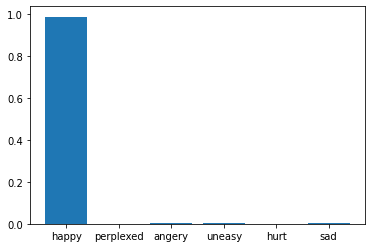

In [ ]:
import matplotlib.pyplot as plt

writing = '기분이 좋다. 왜냐하면 오늘은 공강이기 때문이다.'
score = background(writing)

x = np.arange(6)
sentiments = ['happy', 'perplexed', 'angery', 'uneasy', 'hurt', 'sad']
values = score

plt.bar(x, values)
plt.xticks(x, sentiments)

plt.show()


In [ ]:
writing = '화가 난다.친구와 싸웠다. 슬프다. 마음이 아프다. 기분이 좋다. 왜냐하면 밥이 맛있기 때문이다. 기분이 좋을까 나쁠까'
writing_list = writing.split(".")

for sen in writing_list:
  background(sen)


 기쁨:0.00 당황:0.07 분노:0.54 불안:0.04 상처:0.22 슬픔:0.13
 화가 난다.
 기쁨:0.13 당황:0.17 분노:0.13 불안:0.12 상처:0.22 슬픔:0.23
 친구와 싸웠다.
 기쁨:0.01 당황:0.10 분노:0.03 불안:0.05 상처:0.29 슬픔:0.53
  슬프다.
 기쁨:0.07 당황:0.12 분노:0.08 불안:0.09 상처:0.31 슬픔:0.34
  마음이 아프다.
 기쁨:0.51 당황:0.03 분노:0.04 불안:0.03 상처:0.13 슬픔:0.27
  기분이 좋다.
 기쁨:0.65 당황:0.05 분노:0.06 불안:0.12 상처:0.05 슬픔:0.09
  왜냐하면 밥이 맛있기 때문이다.
 기쁨:0.06 당황:0.11 분노:0.12 불안:0.08 상처:0.37 슬픔:0.26
  기분이 좋을까 나쁠까.